In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as aconst
import scipy.constants as const
from scipy.interpolate import interp1d
from pycbc.filter import overlap_cplx
from pycbc.types import TimeSeries
from pycbc.waveform import taper_timeseries
from pycbc.psd import aLIGOZeroDetHighPower
from pesummary.gw.conversions.mass import component_masses_from_mtotal_q
from simple_pe.waveforms import compute_s_factor, shifted_f, shifted_e, make_waveform
import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")  # silence LAL warnings
from pyseobnr.generate_waveform import GenerateWaveform, generate_modes_opt
# from pycbc.waveform import get_td_waveform

import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this p

lal.MSUN_SI != Msun


In [2]:
mode_array = [(3,3)]
print([int(x[0]*(x[0]-1)/2 + x[1]-2) for x in mode_array])

[4]


In [7]:
np.sqrt(4.20613193e-04)/1.42114669e-21

1.4431203053895905e+19

In [6]:
np.sqrt(1.25670090e-01)/3.11772595e-20

1.137045975224251e+19

In [5]:
params = {'chirp_mass': 24, 'symmetric_mass_ratio': 2/9, 'chi_eff': 0, 'ecc10': float(shifted_e(10, 7, 0.4)), 'inc': np.pi/3}
hp = make_waveform(params, 1/32, 7, (4096*32)//2+1, 'TEOBResumS-Dali').to_timeseries()
plt.plot(hp.sample_times, hp)
plt.xlim(-3, 0.1)

{'t': array([0.00000000e+00, 8.37629126e-01, 4.14220099e+00, ...,
       3.05011247e+04, 3.05016247e+04, 3.05021247e+04]), 'r': array([39.98593227, 39.98585754, 39.98410473, ...,  1.67713086,
        1.61844729,  1.56135187]), 'phi': array([0.00000000e+00, 2.66853249e-03, 1.31966580e-02, ...,
       3.55282161e+02, 3.55363070e+02, 3.55442116e+02]), 'Pphi': array([5.25103836, 5.25103655, 5.25102938, ..., 2.5746106 ,
       2.56107851, 2.54872092]), 'MOmega': array([0.00318581, 0.00318582, 0.00318609, ..., 0.16339167,
       0.16010437, 0.15592764]), 'ddor': array([ 0.        , -0.00021303, -0.00021303, ..., -0.00962765,
       -0.00977407, -0.00987536]), 'Prstar': array([-0.00000000e+00, -1.83855667e-04, -9.09201315e-04, ...,
       -4.40874712e-01, -4.53563566e-01, -4.66518397e-01]), 'MOmega_orb': array([0.        , 0.00318582, 0.00318609, ..., 0.16339167,
       0.16010437, 0.15592764]), 'E': array([0.9962247 , 0.9962247 , 0.9962247 , ..., 0.97085067,
       0.97073204, 0.97064479])}


NameError: name 'fgh' is not defined

In [2]:
# Start with the usual parameter definitions
# Masses in solar masses
m1 = 40
m2 = 20
s1x, s1y, s1z = 0.0, 0.0, 0.0
s2x, s2y, s2z = 0.0, 0.0, 0.0

deltaT = 1.0 / 2048.0
f_min = 10

distance = 1000.0  # Mpc
inclination = np.pi / 3.0
phiRef = 0.0
approximant = "SEOBNRv5EHM"

params_dict = {
    "mass1": m1,
    "mass2": m2,
    "spin1x": s1x,
    "spin1y": s1y,
    "spin1z": s1z,
    "spin2x": s2x,
    "spin2y": s2y,
    "spin2z": s2z,
    "deltaT": deltaT,
    "f22_start": f_min,
    "phi_ref": phiRef,
    "distance": distance,
    "inclination": inclination,
    "approximant": approximant,
    "eccentricity": 0.4
}

In [3]:
# We call the generator with the parameters
wfm_gen = GenerateWaveform(params_dict)

# Generate mode dictionary
times, hlm = wfm_gen.generate_td_modes()

/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-1.0, 0.1)

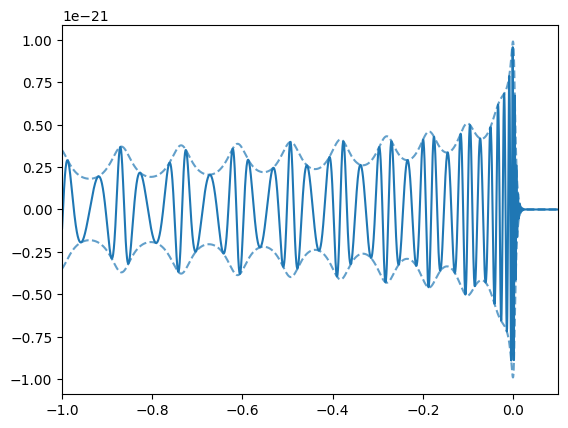

In [4]:
plt.plot(times, hlm[(2,2)], c='C0')
plt.plot(times, np.abs(hlm[(2,2)]), c='C0', alpha=0.7, ls='dashed')
plt.plot(times, -np.abs(hlm[(2,2)]), c='C0', alpha=0.7, ls='dashed')
plt.xlim(-1,0.1)

# Test speed

In [9]:
import time
from simple_pe.waveforms import make_waveform
import logging
_logger = logging.getLogger('PESummary')
_logger.setLevel(logging.CRITICAL + 10)
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

In [10]:
start = time.time()
for i in range(20):
    # Start with the usual parameter definitions
    # Masses in solar masses
    m1 = 40
    m2 = 20
    s1x, s1y, s1z = 0.0, 0.0, 0.0
    s2x, s2y, s2z = 0.0, 0.0, 0.0
    
    deltaT = 1.0 / 2048.0
    f_min = 10
    
    distance = 1000.0  # Mpc
    inclination = 0#np.pi / 3.0
    phiRef = 0.0
    approximant = "SEOBNRv5EHM"
    
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": s1x,
        "spin1y": s1y,
        "spin1z": s1z,
        "spin2x": s2x,
        "spin2y": s2y,
        "spin2z": s2z,
        "deltaT": deltaT,
        "f22_start": f_min,
        "phi_ref": phiRef,
        "distance": distance,
        "inclination": inclination,
        "approximant": approximant,
        "rel_anomaly": np.pi,
        "eccentricity": 0.4
    }

    # We call the generator with the parameters
    wfm_gen = GenerateWaveform(params_dict)
    
    # Generate mode dictionary
    times, hlm = wfm_gen.generate_td_modes()

end = time.time()
print(f'{end-start:.2f} seconds')

8.40 seconds


In [11]:
start = time.time()
params = {'mass_1': 40, 'mass_2': 20, 'spin_1x': 0, 'spin_1y': 0, 'spin_1z': 0, 'spin_2x': 0, 'spin_2y': 0, 'spin_2z': 0,
          'phase': 0, 'distance': 1000, 'inclination': 0, 'ecc10': 0.36}
tlen = 32
sample_rate = 2048
df = 1/tlen
flen = (tlen*sample_rate)//2 + 1
f_low = 10
for i in range(20):
    hp, hc = make_waveform(params, df, f_low, flen, approximant='TEOBResumS-Dali', return_hc=True)

end = time.time()
print(f'{end-start:.2f} seconds')

10.26 seconds


/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/ben.patterson/.conda/envs/igwn_eccentric_new/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


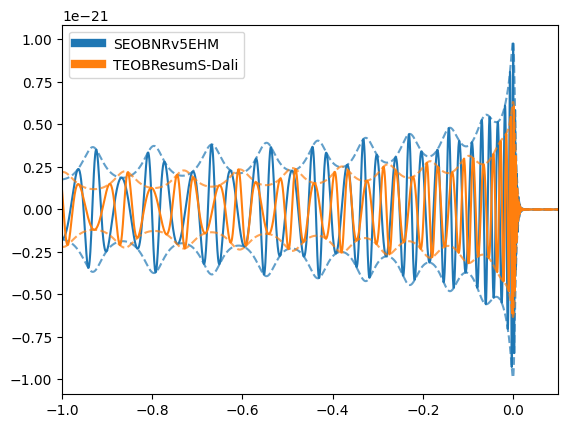

In [12]:
plt.plot(times, hlm[(2,2)], c='C0', label='SEOBNRv5EHM')
plt.plot(times, np.abs(hlm[(2,2)]), ls='dashed', alpha=0.7, c='C0')
plt.plot(times, -np.abs(hlm[(2,2)]), ls='dashed', alpha=0.7, c='C0')
hpt = hp.to_timeseries()
hct = hc.to_timeseries()
ht = hpt - 1j*hct
plt.plot(ht.sample_times, ht, c='C1', label='TEOBResumS-Dali')
plt.plot(ht.sample_times, np.abs(ht), ls='dashed', alpha=0.7, c='C1')
plt.plot(ht.sample_times, -np.abs(ht), ls='dashed', alpha=0.7, c='C1')
plt.xlim(-1,0.1)
plt.legend()
plt.show()

# Dynamics with 'expert' mode

In [13]:
t, r, phi, pr, pphi, e, z, x, H, Omega = wfm_gen.model.dynamics.T

In [14]:
# How to convert from dimensionless x to frequency - 60 here is the total mass
x[0]**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi)

9.99986957224693

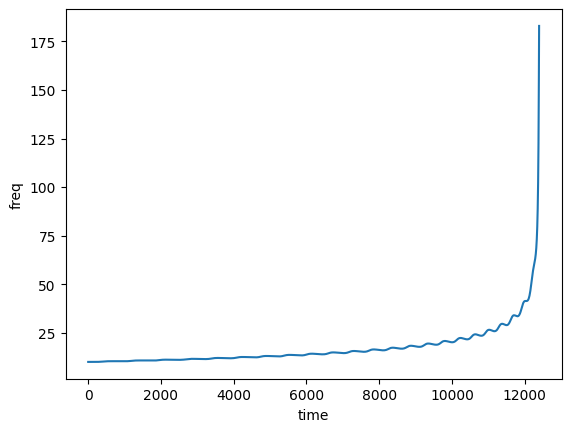

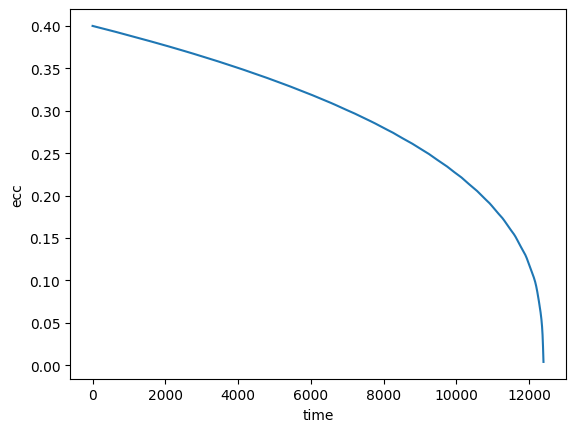

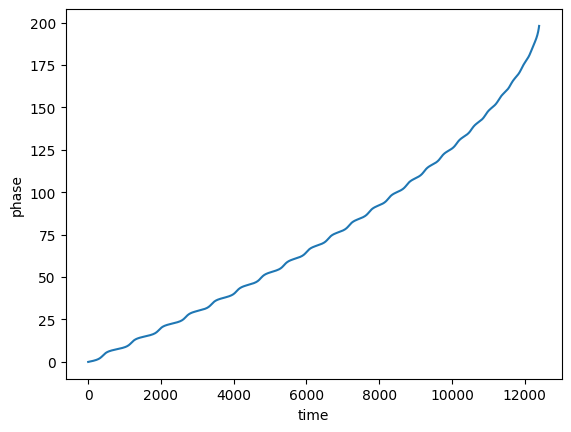

In [15]:
plt.plot(t, x**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi))
plt.xlabel('time')
plt.ylabel('freq')
plt.show()

plt.plot(t, e)
plt.xlabel('time')
plt.ylabel('ecc')
plt.show()

plt.plot(t, phi)
plt.xlabel('time')
plt.ylabel('phase')
plt.show()

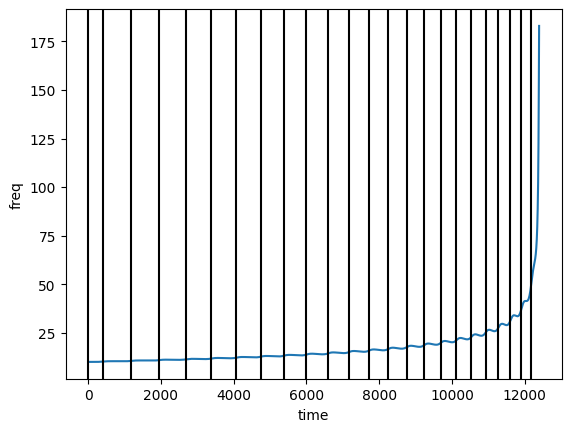

In [16]:
# Find times where rel anomaly = 0
rel_anom_zeroes = []
for i in range(int(z[-1]/(2*np.pi))+1):
    ra_zero = t[np.argmin(np.abs(z-i*2*np.pi))]
    rel_anom_zeroes.append(ra_zero)

plt.plot(t, x**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi))
for raz in rel_anom_zeroes:
    plt.axvline(raz, color='k')
plt.xlabel('time')
plt.ylabel('freq')
plt.show()

In [17]:
x[10]**(3/2)*const.c**3/(const.G*60*aconst.M_sun.value*np.pi)

9.999362100884182

# Rel anomaly parameter

In [18]:
hlms = []
timess = []
n = 6
for i in range(n):
    # Start with the usual parameter definitions
    # Masses in solar masses
    m1 = 40
    m2 = 20
    s1x, s1y, s1z = 0.0, 0.0, 0.0
    s2x, s2y, s2z = 0.0, 0.0, 0.0
    
    deltaT = 1.0 / 2048.0
    f_min = 10
    
    distance = 1000.0  # Mpc
    inclination = np.pi / 3.0
    phiRef = 0.0
    approximant = "SEOBNRv5EHM"
    rel_anomaly = 2*np.pi*i/n
    
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": s1x,
        "spin1y": s1y,
        "spin1z": s1z,
        "spin2x": s2x,
        "spin2y": s2y,
        "spin2z": s2z,
        "deltaT": deltaT,
        "f22_start": f_min,
        "phi_ref": phiRef,
        "distance": distance,
        "inclination": inclination,
        "approximant": approximant,
        "eccentricity": 0.4,
        "rel_anomaly": rel_anomaly
    }

    # We call the generator with the parameters
    wfm_gen = GenerateWaveform(params_dict)
    
    # Generate mode dictionary
    times, hlm = wfm_gen.generate_td_modes()
    hlms.append(hlm)
    timess.append(times)

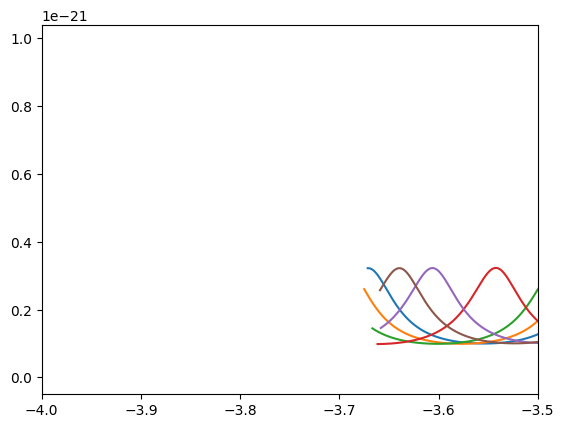

In [19]:
for i in range(n):
    plt.plot(timess[i], np.abs(hlms[i][(2,2)]))
plt.xlim(-4,-3.5)
plt.show()

# Backwards evolution

In [20]:
# Start with the usual parameter definitions
# Masses in solar masses
m1 = 40
m2 = 20
s1x, s1y, s1z = 0.0, 0.0, 0.0
s2x, s2y, s2z = 0.0, 0.0, 0.0

deltaT = 1.0 / 2048.0
f_min = 10

distance = 1000.0  # Mpc
inclination = np.pi / 3.0
phiRef = 0.0
approximant = "SEOBNRv5EHM"
rel_anomaly = 2*np.pi*i/n

params_dict = {
    "mass1": m1,
    "mass2": m2,
    "spin1x": s1x,
    "spin1y": s1y,
    "spin1z": s1z,
    "spin2x": s2x,
    "spin2y": s2y,
    "spin2z": s2z,
    "deltaT": deltaT,
    "f22_start": f_min,
    "phi_ref": phiRef,
    "distance": distance,
    "inclination": inclination,
    "approximant": approximant,
    "eccentricity": 0.4,
    "rel_anomaly": rel_anomaly
}

params_dict_bw = params_dict.copy()
params_dict_bw.update({"t_backwards": 1000, "warning_bwd_int" : False})

# We call the generator with the parameters
wfm_gen = GenerateWaveform(params_dict)
wfm_gen_bw = GenerateWaveform(params_dict_bw)

# Generate mode dictionary
times, hlm = wfm_gen.generate_td_modes()
times_bw, hlm_bw = wfm_gen_bw.generate_td_modes()

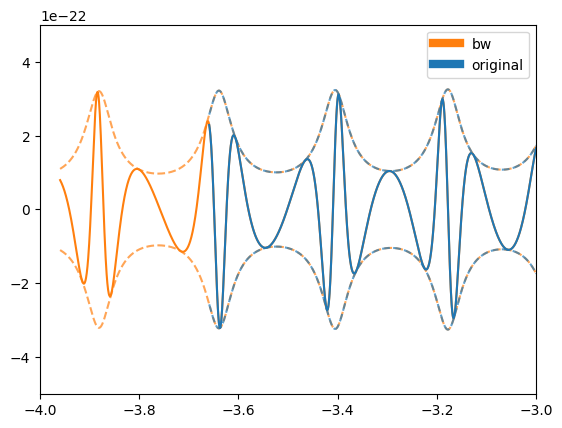

In [21]:
plt.plot(times_bw, hlm_bw[(2,2)], c='C1', label='bw')
plt.plot(times_bw, np.abs(hlm_bw[(2,2)]), alpha=0.7, ls='dashed', c='C1')
plt.plot(times_bw, -np.abs(hlm_bw[(2,2)]), alpha=0.7, ls='dashed', c='C1')
plt.plot(times, hlm[(2,2)], c='C0', label='original')
plt.plot(times, np.abs(hlm[(2,2)]), alpha=0.7, ls='dashed', c='C0')
plt.plot(times, -np.abs(hlm[(2,2)]), alpha=0.7, ls='dashed', c='C0')
plt.xlim(-4,-3)
plt.ylim(-0.5e-21, 0.5e-21)
plt.legend()
plt.show()

# Replacing TEOBResumS-Dali with SEOBNRv5EHM

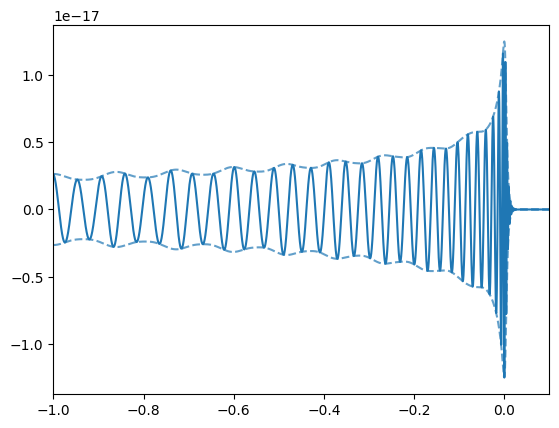

In [22]:
def seob_wf_replace(M, q, e, chi1, chi2, f_gen, s_rate, phase=0,
            inclination=0, distance=1, f_ref_e=None,
            tlen=None, taper=True, to_fs=True,
            mode_array=[[2, 2]]):

    # Import teobresums
    try:
        import pyseobnr
    except ImportError:
        print("Unable to import pyseobnr, please check it is installed")
        return -1

    # Convert eccentricity to correct frequency
    if f_ref_e is None:
        f_ref_e = f_gen
    else:
        e = shifted_e(f_gen, f_ref_e, e)
    if isinstance(e, np.ndarray) and len(np.shape(e)) == 0:
        e = e.item()

    # Convert to component masses
    m1, m2 = component_masses_from_mtotal_q(M, q)

    # Generate waveform
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": 0,
        "spin1y": 0,
        "spin1z": chi1,
        "spin2x": 0,
        "spin2y": 0,
        "spin2z": chi2,
        "deltaT": 1/s_rate,
        "f22_start": f_gen,
        "f_ref": f_ref_e,
        "phi_ref": phase,
        "distance": distance,
        "inclination": inclination,
        "approximant": 'SEOBNRv5EHM',
        "eccentricity": e,
        "rel_anomaly": np.pi
    }

    wfm_gen = GenerateWaveform(params_dict)
    hp, hc = wfm_gen.generate_td_polarizations()
    t = hp.deltaT * np.arange(hp.data.length) + float(hp.epoch)
    hp = TimeSeries(hp.data.data, t[1] - t[0], epoch=t[0])
    hc = TimeSeries(hc.data.data, t[1] - t[0], epoch=t[0])

    # Resize waveforms, taper, and return in requested domain
    if tlen is not None:
        hp.resize(tlen*s_rate)
        hc.resize(tlen*s_rate)
    if taper:
        hp = taper_timeseries(hp, tapermethod='start')
        hc = taper_timeseries(hc, tapermethod='start')
    if to_fs:
        hp = hp.to_frequencyseries()
        hc = hc.to_frequencyseries()
    return hp, hc

def get_comp_shifts_replace(h, M, q, e, chi1, chi2, f_gen, s_rate, tlen, n_ecc_gen):

    s_f = shifted_f(f_gen, e, M, q)
    if e > 0:

        # Generate trial waveform shifted back by estimated 2pi in mean anomaly
        s_e = shifted_e(s_f, f_gen, e)
        s_wf_p, s_wf_c = seob_wf_replace(M, q, s_e, chi1, chi2,
                         s_f, s_rate, tlen=tlen,
                         taper=False, to_fs=False)
        s_wf = s_wf_p - 1j*s_wf_c

        # Work out shift correction factor by examining peaks of both waveforms
        s_factor = compute_s_factor(h, s_wf)

    else:
        s_factor = 1
    if s_factor < 0.5 or s_factor > 2:
        raise RuntimeError('Unable to accurately identify how to shift '
                           'frequency and eccentricity for component '
                           'waveforms')

    # Finds shifted frequency and eccentricity of shifted waveforms
    max_s_f = f_gen - (f_gen - s_f)*s_factor
    if max_s_f <= 0:
        raise RuntimeError('Tried to generate component waveform with '
                           'negative starting frequency')
    s_f_vals = np.linspace(f_gen, max_s_f, n_ecc_gen, endpoint=False)[1:]
    s_e_vals = shifted_e(s_f_vals, f_gen, e)

    return s_f_vals, s_e_vals


def gen_component_wfs_replace(M, q, e, chi1, chi2, f_gen, f_low, s_rate, phase,
                          inclination, distance, tlen, n_ecc_gen, psd=None):

    # Get psd into correct format if inputted
    if psd is not None:
        if type(psd) is dict:
            psd_dict = psd
        else:
            psd_dict = {'psd': psd}
        if tlen is None:
            tlen = int(1/psd_dict[list(psd_dict.keys())[0]].delta_f)

    # Calculates first component waveform and shifts required for others
    hp, hc = seob_wf_replace(M, q, e, chi1, chi2, f_gen, s_rate,
             phase=phase, inclination=inclination,
             distance=distance, tlen=tlen,
             taper=False, to_fs=False)
    h = hp - 1j*hc
    s_f_vals, s_e_vals = get_comp_shifts_replace(h, M, q, e, chi1, chi2, f_gen, s_rate,
                                              tlen, n_ecc_gen)

    # Taper first waveform
    h_taper_p = taper_timeseries(h.real(), tapermethod='start')
    h_taper_c = taper_timeseries(-h.imag(), tapermethod='start')
    h = h_taper_p - 1j*h_taper_c

    # Calculates psd if not inputted
    if psd is None:
        h.resize(2**np.ceil(np.log2(len(h))))
        delta_f = 1.0 / h.duration
        flen = len(h)//2 + 1
        psd_dict = {'psd': aLIGOZeroDetHighPower(flen, delta_f, f_low)}

    # Save first component waveform
    h_ts = h.sample_times
    h_dt = h.delta_t
    h_start = h.start_time
    comp_wfs = {key: [h] for key in psd_dict.keys()}

    # Generate all component waveforms
    for i in range(n_ecc_gen-1):

        # Create waveform
        hp, hc = seob_wf_replace(M, q, s_e_vals[i], chi1, chi2,
                         s_f_vals[i], s_rate, phase=phase,
                         inclination=inclination,
                         distance=distance, tlen=tlen,
                         to_fs=False)
        h = hp - 1j*hc

        # Trim waveform to same size as first (shortest)
        wf_trim_interpolate = interp1d(h.sample_times, h, bounds_error=False,
                                       fill_value=0)
        wf_trim_strain = wf_trim_interpolate(h_ts)
        h = TimeSeries(wf_trim_strain, h_dt,
                       epoch=h_start)

        # Correct phase and taper for each psd
        for key in psd_dict.keys():
            overlap = overlap_cplx(h.real(), comp_wfs[key][0].real(),
                                   psd=psd_dict[key],
                                   low_frequency_cutoff=f_low,
                                   normalized=True)
            phase_angle = -np.angle(overlap)/2
            h_psd = h*np.exp(2*1j*phase_angle)

            # Re-taper waveform after trimming
            h_taper_p = taper_timeseries(h_psd.real(), tapermethod='start')
            h_taper_c = taper_timeseries(-h_psd.imag(), tapermethod='start')
            h_psd = h_taper_p - 1j*h_taper_c

            comp_wfs[key].append(h_psd)

    return comp_wfs, psd_dict

comp_wfs =  gen_component_wfs_replace(60, 2, 0.4, 0, 0, 10, 10, 4096, 0,
                                      0, 1, 32, 20, psd=None)[0]['psd']
h0 = comp_wfs[0].copy()
for i in range(1, len(comp_wfs)):
    h0 += comp_wfs[i]
plt.plot(h0.sample_times, h0, c='C0')
plt.plot(h0.sample_times, np.abs(h0), c='C0', alpha=0.7, ls='dashed')
plt.plot(h0.sample_times, -np.abs(h0), c='C0', alpha=0.7, ls='dashed')
plt.xlim(-1, 0.1)
plt.show()

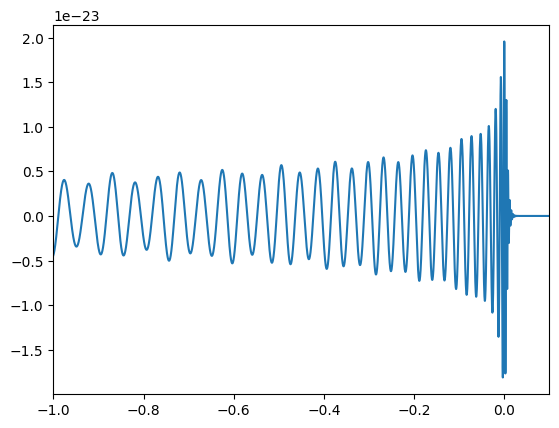

In [23]:
params = {'total_mass': 60, 'mass_ratio': 2, 'spin_1x': 0, 'spin_1y': 0, 'spin_1z': 0, 'spin_2x': 0, 'spin_2y': 0, 'spin_2z': 0,
          'phase': 0, 'distance': 1000, 'inclination': 0, 'ecc10': 0.36}
tlen = 32
sample_rate = 4096
df = 1/tlen
flen = (tlen*sample_rate)//2 + 1
f_low = 10
teob_harms = make_waveform(params, df, f_low, flen, approximant='TEOBResumS-Dali-Harms', n_ecc_harms=1, n_ecc_gen=20)

h0 = teob_harms.to_timeseries()
plt.plot(h0.sample_times, h0)
plt.xlim(-1, 0.1)
plt.show()

# Shift back with evolution information

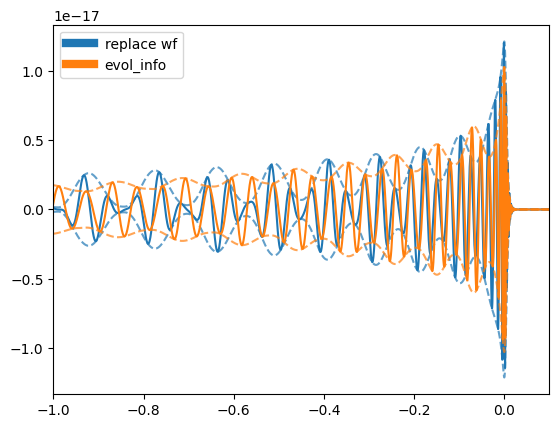

In [24]:
def seob_wf_dyn(M, q, e, chi1, chi2, f_gen, s_rate, phase=0,
            inclination=0, distance=1, t_bw=0, f_ref_e=None,
            tlen=None, taper=True, to_fs=True, return_model=False,
            mode_array=[[2, 2]]):

    # Import teobresums
    try:
        import pyseobnr
    except ImportError:
        print("Unable to import pyseobnr, please check it is installed")
        return -1

    # Convert eccentricity to correct frequency
    if f_ref_e is None:
        f_ref_e = f_gen
    else:
        e = shifted_e(f_gen, f_ref_e, e)
    if isinstance(e, np.ndarray) and len(np.shape(e)) == 0:
        e = e.item()

    # Convert to component masses
    m1, m2 = component_masses_from_mtotal_q(M, q)

    # Generate waveform
    params_dict = {
        "mass1": m1,
        "mass2": m2,
        "spin1x": 0,
        "spin1y": 0,
        "spin1z": chi1,
        "spin2x": 0,
        "spin2y": 0,
        "spin2z": chi2,
        "deltaT": 1/s_rate,
        "f22_start": f_gen,
        "f_ref": f_ref_e,
        "phi_ref": phase,
        "distance": distance,
        "inclination": inclination,
        "approximant": 'SEOBNRv5EHM',
        "eccentricity": e,
        "rel_anomaly": np.pi,
        "t_backwards": t_bw,
        "warning_bwd_int" : False
    }

    wfm_gen = GenerateWaveform(params_dict)
    hp, hc = wfm_gen.generate_td_polarizations()
    t = hp.deltaT * np.arange(hp.data.length) + float(hp.epoch)
    hp = TimeSeries(hp.data.data, t[1] - t[0], epoch=t[0])
    hc = TimeSeries(hc.data.data, t[1] - t[0], epoch=t[0])

    # Resize waveforms, taper, and return in requested domain
    if tlen is not None:
        hp.resize(tlen*s_rate)
        hc.resize(tlen*s_rate)
    if taper:
        hp = taper_timeseries(hp, tapermethod='start')
        hc = taper_timeseries(hc, tapermethod='start')
    if to_fs:
        hp = hp.to_frequencyseries()
        hc = hc.to_frequencyseries()
    if return_model:
        return hp, hc, wfm_gen.model
    else:
        return hp, hc

def get_comp_shifts_dyn(M, q, e, chi1, chi2, f_gen, s_rate, phase, n_ecc_gen):

    # Get bw evolved wf
    P_orb = 2/f_gen
    t_bw = 3*P_orb*const.c**3/(const.G*aconst.M_sun.value*M)
    hp, hc, model = seob_wf_dyn(M, q, e, chi1, chi2,
                         f_gen, s_rate, t_bw=t_bw, phase=phase,
                         taper=False, to_fs=False, return_model=True)

    # Get dynamics parameters
    t_dyn, _, phi_dyn, _, _, e_dyn, z_dyn, x_dyn, _, _ = model.dynamics.T
    t_dyn = t_dyn[:-100]
    phi_dyn = phi_dyn[:-100]
    e_dyn = e_dyn[:-100]
    x_dyn = x_dyn[:-100]
    z_dyn = z_dyn[:-100]
    t_SI = (t_dyn-t_bw)*(const.G*aconst.M_sun.value*M)/const.c**3
    phi_interp = interp1d(t_SI, phi_dyn)
    e_interp = interp1d(t_SI, e_dyn)
    f_interp = interp1d(t_SI, x_dyn**(3/2)*const.c**3/(const.G*M*aconst.M_sun.value*np.pi))
    z_interp = interp1d(t_SI, z_dyn)
    z_interp_r = interp1d(z_dyn, t_SI)
    phi_0 = phi_interp(0)
    e_0 = e_interp(0)
    f_0 = f_interp(0)
    z_0 = z_interp(0)

    # Find discrete points with equivalent relativistic anomaly
    t_radial_Ps = []
    z_check = z_0.copy()
    while z_check <= z_dyn[-1]:
        t_radial_Ps.append(z_interp_r(z_check.copy()))
        z_check += 2*np.pi
    z_check = z_0.copy()-2*np.pi
    while z_check >= z_dyn[0]:
        t_radial_Ps.insert(0, z_interp_r(z_check.copy()))
        z_check -= 2*np.pi

    # Interpolate to find f, e pairs
    phi_disc_interp = interp1d(z_interp(t_radial_Ps), phi_interp(t_radial_Ps), kind='cubic')
    e_disc_interp = interp1d(z_interp(t_radial_Ps), e_interp(t_radial_Ps), kind='cubic')
    f_disc_interp = interp1d(z_interp(t_radial_Ps), f_interp(t_radial_Ps), kind='cubic')
    comp_wf_zs = np.array([z_0-i*2*np.pi/n_ecc_gen for i in range(n_ecc_gen)])
    comp_wf_phis = phi_disc_interp(comp_wf_zs) + (phase - phi_0)
    comp_wf_es = e_disc_interp(comp_wf_zs) + (e - e_0)
    comp_wf_fs = f_disc_interp(comp_wf_zs) + (f_gen - f_0)
    
    return comp_wf_fs, comp_wf_es, comp_wf_phis


def gen_component_wfs_dyn(M, q, e, chi1, chi2, f_gen, f_low, s_rate, phase,
                          inclination, distance, tlen, n_ecc_gen, psd=None):

    # Get psd into correct format if inputted
    if psd is not None:
        if type(psd) is dict:
            psd_dict = psd
        else:
            psd_dict = {'psd': psd}
        if tlen is None:
            tlen = int(1/psd_dict[list(psd_dict.keys())[0]].delta_f)

    # Shifts required for component waveforms
    s_f_vals, s_e_vals, s_phi_vals = get_comp_shifts_dyn(M, q, e, chi1, chi2, f_gen, s_rate, phase, n_ecc_gen)

    # Generate all component waveforms
    for i in range(n_ecc_gen):

        # Create waveform
        hp, hc = seob_wf_dyn(M, q, s_e_vals[i], chi1, chi2,
                         s_f_vals[i], s_rate, phase=s_phi_vals[i],
                         inclination=inclination,
                         distance=distance, tlen=tlen,
                         to_fs=False)
        h = hp - 1j*hc

        # First waveform
        if i == 0:

            # Calculates psd if not inputted
            if psd is None:
                h.resize(2**np.ceil(np.log2(len(h))))
                delta_f = 1.0 / h.duration
                flen = len(h)//2 + 1
                psd_dict = {'psd': aLIGOZeroDetHighPower(flen, delta_f, f_low)}
        
            # Save first component waveform
            h_ts = h.sample_times
            h_dt = h.delta_t
            h_start = h.start_time
            comp_wfs = {key: [h] for key in psd_dict.keys()}

        # All other waveforms
        else:
            
            # Trim waveform to same size as first (shortest)
            wf_trim_interpolate = interp1d(h.sample_times, h, bounds_error=False,
                                           fill_value=0)
            wf_trim_strain = wf_trim_interpolate(h_ts)
            h = TimeSeries(wf_trim_strain, h_dt,
                           epoch=h_start)
    
            # Correct phase and taper for each psd
            for key in psd_dict.keys():
                # overlap = overlap_cplx(h.real(), comp_wfs[key][0].real(),
                #                        psd=psd_dict[key],
                #                        low_frequency_cutoff=f_low,
                #                        normalized=True)
                # phase_angle = -np.angle(overlap)/2
                # h_psd = h*np.exp(2*1j*phase_angle)
    
                # Re-taper waveform after trimming
                h_taper_p = taper_timeseries(h.real(), tapermethod='start')
                h_taper_c = taper_timeseries(-h.imag(), tapermethod='start')
                h_psd = h_taper_p - 1j*h_taper_c
    
                comp_wfs[key].append(h_psd)

    return comp_wfs, psd_dict

comp_wfs_r = gen_component_wfs_replace(60, 2, shifted_e(9.7, 10, 0.5), 0, 0, 9.7, 10, 4096, 0,
                                      0, 1, 8, 20, psd=None)[0]['psd']
comp_wfs_d = gen_component_wfs_dyn(60, 2, shifted_e(9.7, 10, 0.5), 0, 0, 9.7, 10, 4096, 0,
                                      0, 1, 8, 20, psd=None)[0]['psd']
h0_r = comp_wfs_r[0].copy()
for i in range(1, len(comp_wfs_r)):
    h0_r += comp_wfs_r[i]
plt.plot(h0_r.sample_times, h0_r, c='C0', label='replace wf')
plt.plot(h0_r.sample_times, np.abs(h0_r), c='C0', alpha=0.7, ls='dashed')
plt.plot(h0_r.sample_times, -np.abs(h0_r), c='C0', alpha=0.7, ls='dashed')
h0_d = comp_wfs_d[0].copy()
for i in range(1, len(comp_wfs_d)):
    h0_d += comp_wfs_d[i]
plt.plot(h0_d.sample_times, h0_d, c='C1', label='evol_info')
plt.plot(h0_d.sample_times, np.abs(h0_d), c='C1', alpha=0.7, ls='dashed')
plt.plot(h0_d.sample_times, -np.abs(h0_d), c='C1', alpha=0.7, ls='dashed')
plt.xlim(-1, 0.1)
plt.legend()
plt.show()

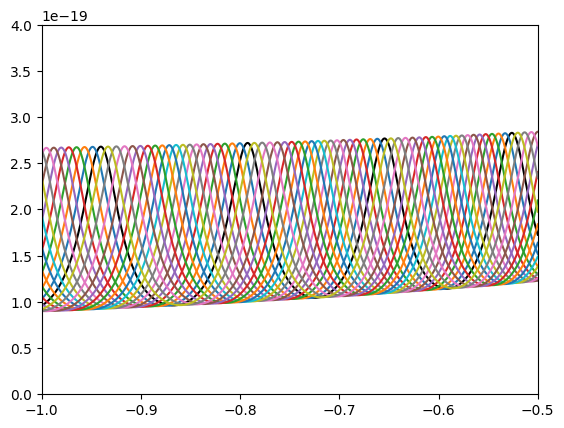

In [25]:
for i, wf in enumerate(comp_wfs_d):
    if i == 0:
        plt.plot(wf.sample_times, np.abs(wf), c='k')
    else:
        plt.plot(wf.sample_times, np.abs(wf))
plt.ylim(0, 4e-19)
plt.xlim(-1, -0.5)
plt.show()

In [26]:
comp_wfs_fr = {}
h0_frs = {}
for f_gen in np.linspace(9.5, 10, 11):
    comp_wfs_fr[f_gen] = gen_component_wfs_replace(60, 2, shifted_e(f_gen, 10, 0.5), 0, 0, f_gen, 10, 4096, np.pi/3,
                                       0, 1, 8, 20, psd=None)[0]['psd']
    h0_fr = comp_wfs_fr[f_gen][0].copy()
    for i in range(1, len(comp_wfs_fr[f_gen])):
        h0_fr += comp_wfs_fr[f_gen][i]
    h0_frs[f_gen] = h0_fr

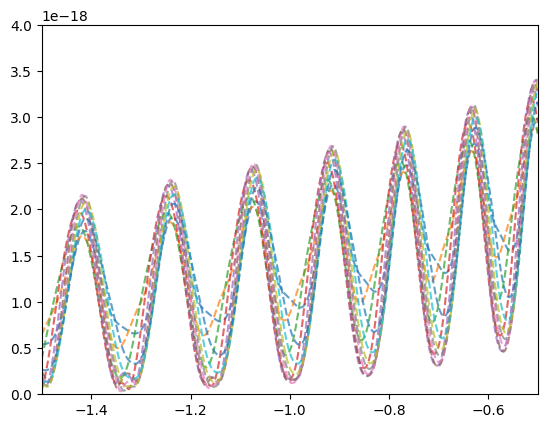

In [27]:
for i, f_gen in enumerate(np.linspace(9.5, 10, 11)):
    # plt.plot(h0_frs[f_gen].sample_times, h0_frs[f_gen], c=f'C{i}', label='evol_info')
    plt.plot(h0_frs[f_gen].sample_times, np.abs(h0_frs[f_gen]), c=f'C{i}', alpha=0.7, ls='dashed')
    # plt.plot(h0_frs[f_gen].sample_times, -np.abs(h0_frs[f_gen]), c=f'C{i}', alpha=0.7, ls='dashed')
plt.xlim(-1.5, -0.5)
plt.ylim(0,0.4e-17)
plt.show()

In [28]:
comp_wfs_f = {}
h0_fs = {}
for f_gen in np.linspace(9.5, 10, 11):
    comp_wfs_f[f_gen] = gen_component_wfs_dyn(60, 2, shifted_e(f_gen, 10, 0.5), 0, 0, f_gen, 10, 4096, np.pi/3,
                                       0, 1, 8, 20, psd=None)[0]['psd']
    h0_f = comp_wfs_f[f_gen][0].copy()
    for i in range(1, len(comp_wfs_f[f_gen])):
        h0_f += comp_wfs_f[f_gen][i]
    h0_fs[f_gen] = h0_f

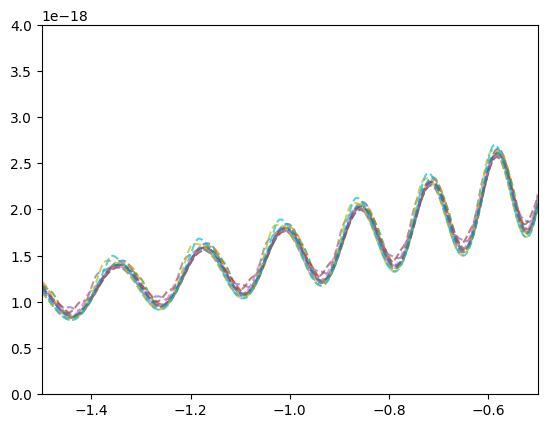

In [29]:
for i, f_gen in enumerate(np.linspace(9.5, 10, 11)):
    # plt.plot(h0_fs[f_gen].sample_times, h0_fs[f_gen], c=f'C{i}', label='evol_info')
    plt.plot(h0_fs[f_gen].sample_times, np.abs(h0_fs[f_gen]), c=f'C{i}', alpha=0.7, ls='dashed')
    # plt.plot(h0_fs[f_gen].sample_times, -np.abs(h0_fs[f_gen]), c=f'C{i}', alpha=0.7, ls='dashed')
plt.xlim(-1.5, -0.5)
plt.ylim(0,0.4e-17)
plt.show()

# SVD on SEOBNRv5EHM component wfs

In [30]:
comp_wfs_svd_full = gen_component_wfs_dyn(60, 2, shifted_e(5, 10, 0.4), 0, 0, 5, 10, 4096, 0,
                                          0, 1, 32, 20, psd=None)[0]['psd']
t_upper_ind = np.argmin(np.abs(comp_wfs_svd_full[0].sample_times+0.1))
comp_wfs_svd_short = [wf[t_upper_ind-4096*8:t_upper_ind] for wf in comp_wfs_svd_full]

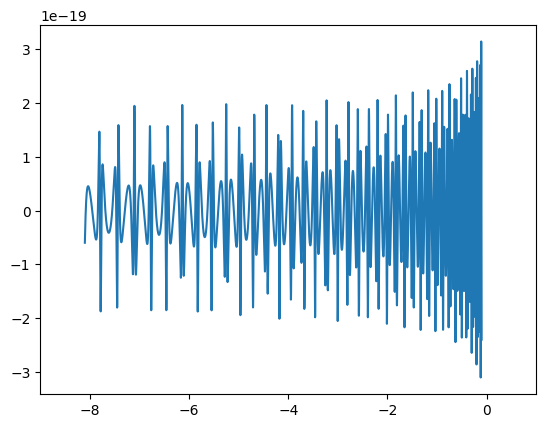

In [32]:
plt.plot(comp_wfs_svd_short[0].sample_times, comp_wfs_svd_short[0])
plt.xlim(-9, 1)
plt.show()

In [33]:
# Convert comp wf data to np array in right shape/form and calculate svd
print('Starting SVD calculation')
start = time.time()
X = np.array(comp_wfs_svd_short)
means = X.mean(axis=1)
stds = X.std(axis=1)
Uh, S, V = np.linalg.svd(((X.T-means)/stds).T)
end = time.time()
print(f'Time taken: {end-start} seconds')

Starting SVD calculation
Time taken: 45.1328604221344 seconds


In [34]:
inv_S = 1/S
U = np.conj(Uh).T
inv_S_U = np.matmul(np.diag(inv_S), U)

SVD_harms_full = np.matmul(inv_S_U, np.array(comp_wfs_svd_full))

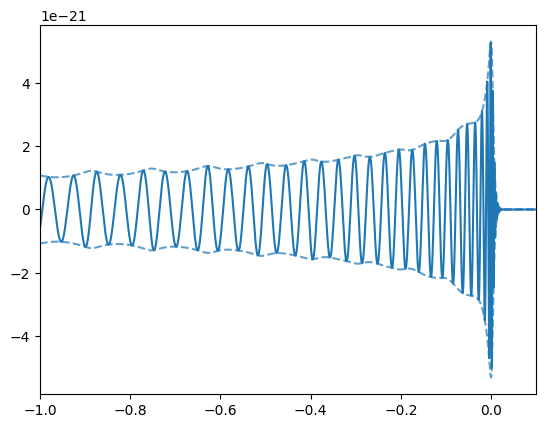

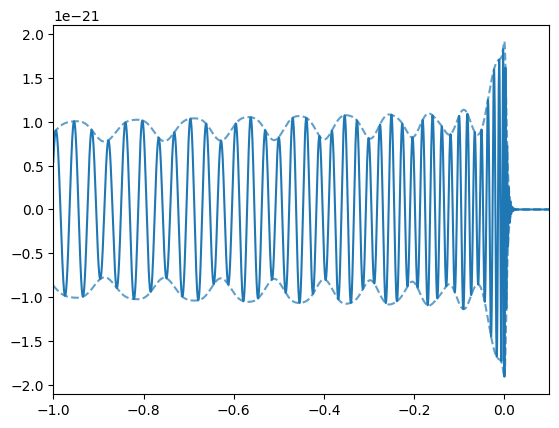

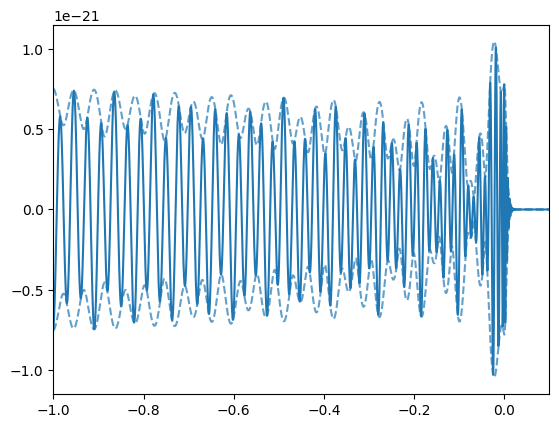

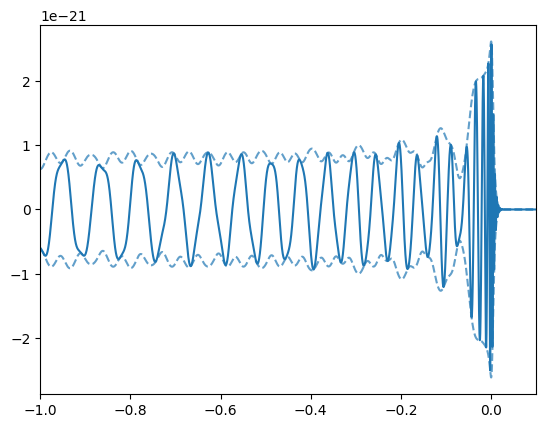

In [35]:
for i in range(4):
    plt.plot(comp_wfs_svd_full[0].sample_times, SVD_harms_full[i], c='C0')
    plt.plot(comp_wfs_svd_full[0].sample_times, np.abs(SVD_harms_full[i]), c='C0', ls='dashed', alpha=0.7)
    plt.plot(comp_wfs_svd_full[0].sample_times, -np.abs(SVD_harms_full[i]), c='C0', ls='dashed', alpha=0.7)
    plt.xlim(-1,0.1)
    plt.show()

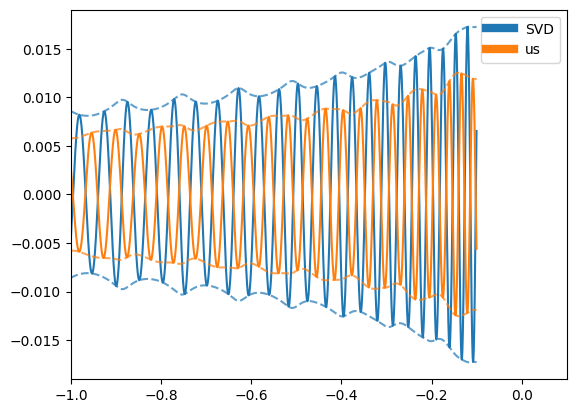

In [36]:
plt.plot(comp_wfs_svd_short[0].sample_times, V[0], c='C0', label='SVD')
plt.plot(comp_wfs_svd_short[0].sample_times, np.abs(V[0]), c='C0', alpha=0.7, ls='dashed')
plt.plot(comp_wfs_svd_short[0].sample_times, -np.abs(V[0]), c='C0', alpha=0.7, ls='dashed')
h0 = comp_wfs_svd_short[0].copy()
for i in range(1, len(comp_wfs_svd_short)):
    h0 += comp_wfs_svd_short[i]
h0 /= np.std(h0)
plt.plot(h0.sample_times, h0*0.004, c='C1', label='us')
plt.plot(h0.sample_times, np.abs(h0)*0.004, c='C1', alpha=0.7, ls='dashed')
plt.plot(h0.sample_times, -np.abs(h0)*0.004, c='C1', alpha=0.7, ls='dashed')
plt.legend()
plt.xlim(-1, 0.1)
plt.show()

In [37]:
# Calculates relative importance of each harmonic
rel_imports = []
for i in range(10):
    rel_imports.append(S[i]**2/np.sum(S**2))
    print('Harmonic {} contains {:.4f}% of the total information.'.format(i, rel_imports[i]*100))

print('\n')
print('Harmonics 0 and 1 combined contain {:.4f}% of the total information.'.format((rel_imports[0]+rel_imports[1])*100))

Harmonic 0 contains 39.1507% of the total information.
Harmonic 1 contains 27.4089% of the total information.
Harmonic 2 contains 13.0108% of the total information.
Harmonic 3 contains 10.6677% of the total information.
Harmonic 4 contains 5.6594% of the total information.
Harmonic 5 contains 2.4010% of the total information.
Harmonic 6 contains 0.9962% of the total information.
Harmonic 7 contains 0.4068% of the total information.
Harmonic 8 contains 0.1641% of the total information.
Harmonic 9 contains 0.0656% of the total information.


Harmonics 0 and 1 combined contain 66.5596% of the total information.


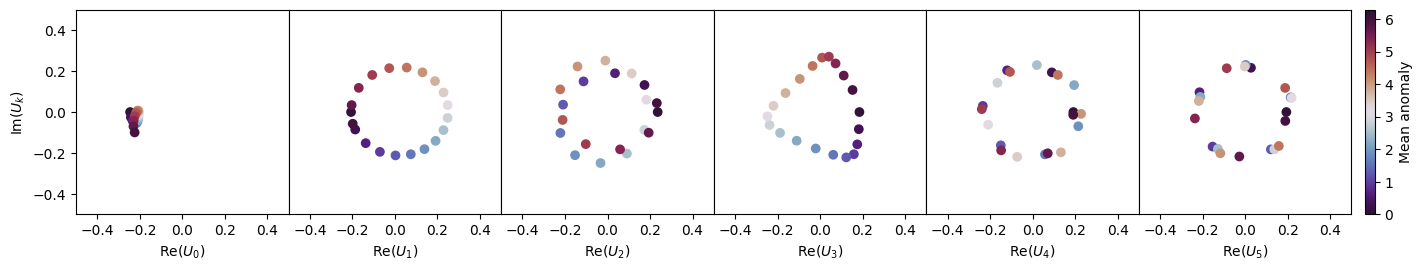

In [38]:
# Make plot
n_comp = 6
lim = 0.5
f = plt.figure(figsize=(6.4*0.75*n_comp/2, 3.75*0.75))
widths = np.ones(n_comp)
widths[-1] += 0.25
f.subplots(1, n_comp, gridspec_kw={'width_ratios': widths, 'wspace': 0}, sharey=True)
colors = np.linspace(0, 2*np.pi, len(comp_wfs_svd_short), endpoint=False)
U = np.conj(Uh).T
for i in range(n_comp):
    plt.subplot(1, n_comp, i+1)
    plt.scatter(np.real(U[i]), np.imag(U[i]), c=colors, vmin=0, vmax=2*np.pi, cmap='twilight_shifted')
    plt.xlim(-lim, lim)
    plt.ylim(-lim, lim)
    plt.xlabel(r'Re($U_%d$)' % i)
    if i == 0:
        plt.ylabel('Im($U_k$)')
    else:
        plt.gca().get_yaxis().set_visible(False)

# Plot formatting
plt.colorbar(label='Mean anomaly')
plt.tight_layout()
plt.show()

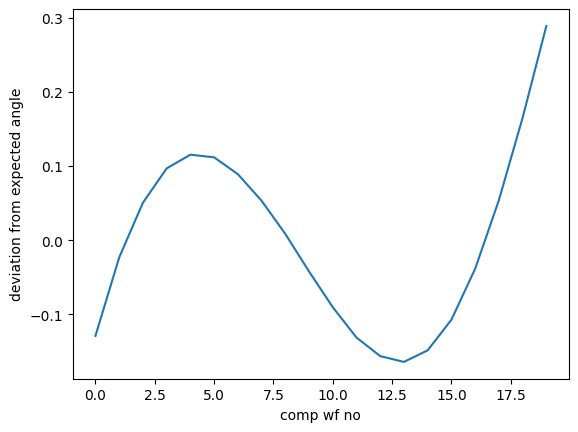

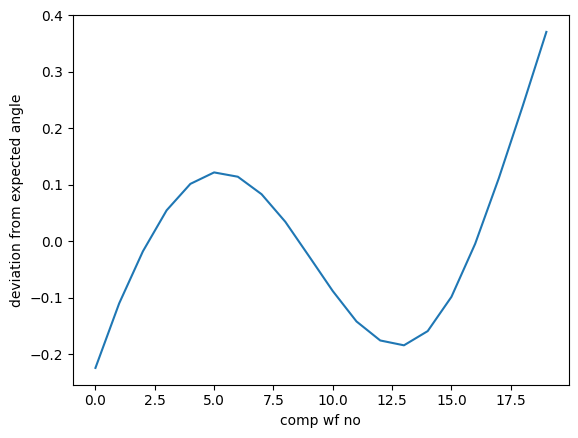

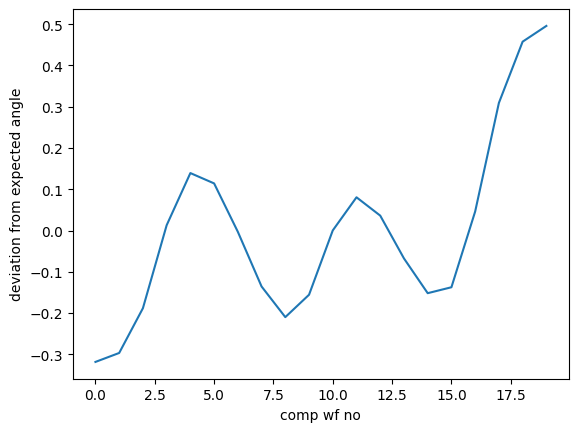

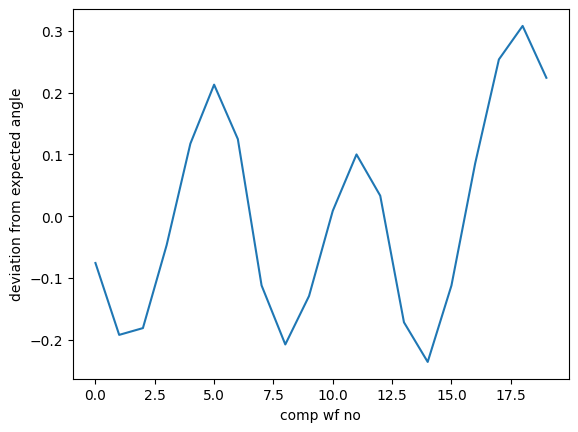

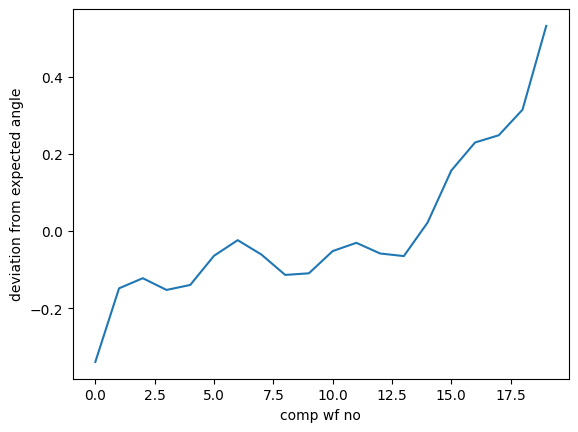

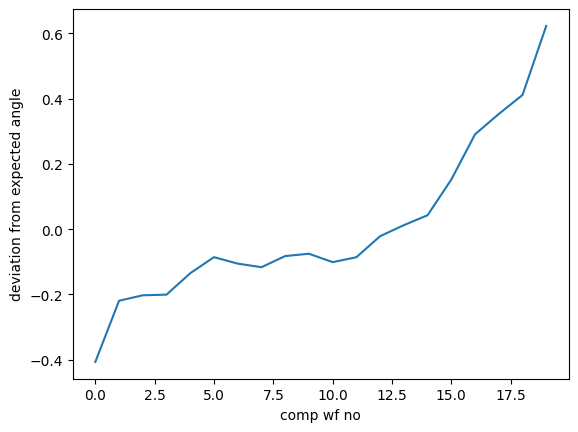

In [39]:
coeffs = [0,1,2,-1,3,4]
for i in range(n_comp):
    raw_angles = np.angle(U[i])%(2*np.pi)
    exp_angles = np.angle(np.exp(coeffs[i]*1j*2*np.pi/len(raw_angles))**np.arange(len(raw_angles)))
    diff_angles = (raw_angles - exp_angles)%(2*np.pi)
    mean_angle = np.angle(np.sum(np.exp(1j*diff_angles)))%(2*np.pi)
    diff_norm_angles = (diff_angles - mean_angle)
    diff_norm_angles = (diff_norm_angles+np.pi)%(2*np.pi)-np.pi
    plt.plot(np.arange(len(raw_angles)), diff_norm_angles)
    plt.xlabel('comp wf no')
    plt.ylabel('deviation from expected angle')
    plt.show()
# plt.plot(np.arange(len(U[0])), np.angle(U[0])%(2*np.pi)-np.mean(np.angle(U[0])%(2*np.pi)))
plt.show()